In [1]:
import sys
import os
import json
from visualization import *

In [2]:
sys.path.append('Markov/')

In [3]:
from markovchain import *

In [4]:
data_path="Data/dataset.json"

In [5]:
with open(data_path, "r") as f:
    training_data=json.load(f)

In [6]:
states=extract_states(training_data)
model=MarkovChainMelodyGenerator(states)
model.train(training_data)

In [11]:
generated_melody = model.generate(100)

In [12]:
generated_melody=generated_to_string(generated_melody)
print(generated_melody)

C#6-0.25, E6-0.25, G5-0.25, G#5-0.25, A5-0.25, B-5-0.25, F6-0.25, C#6-0.25, C6-0.25, B5-0.25, A5-0.25, F#6-0.25, E6-0.5, F#5-0.25, C#6-0.25, E6-0.25, G5-0.25, G#5-0.25, A5-0.25, B-5-0.25, F6-0.25, C#6-0.25, E6-0.25, E6-0.25, G5-0.25, G#5-0.25, A5-0.25, F#6-0.25, E6-0.5, F#5-0.25, C#6-0.25, C6-0.25, B5-0.25, A5-0.25, B-5-0.25, F6-0.25, C#6-0.25, C6-0.25, C5-0.25, D5-0.25, C5-0.25, F#4-0.25, A4-0.25, A4-0.25, A4-0.25, C5-0.5, E4-0.25, G4-0.25, C5-0.5, D5-0.25, D#5-0.25, E5-0.25, C5-0.5, E4-0.25, G4-0.25, C5-0.25, D5-0.25, C5-0.5, D5-0.25, D5-0.25, C5-0.5, D5-0.25, D5-0.25, D5-0.25, C5-0.25, D5-0.25, C5-0.5, D5-0.25, D5-0.25, C5-0.25, D5-0.25, C5-0.25, F#4-0.25, A4-0.25, A4-0.25, C5-0.5, D5-0.25, D5-0.25, C5-0.25, E4-0.25, G4-0.25, C5-0.25, B4-0.25, E5-0.25, E5-0.25, C5-0.5, A4-0.25, C5-0.5, F5-0.25, C5-0.5, F5-0.25, C5-0.5, D5-0.25, C5-0.25, D5-0.25, C5-0.25, E4-0.25, G4-0.25, C5-0.5, D5-0.25


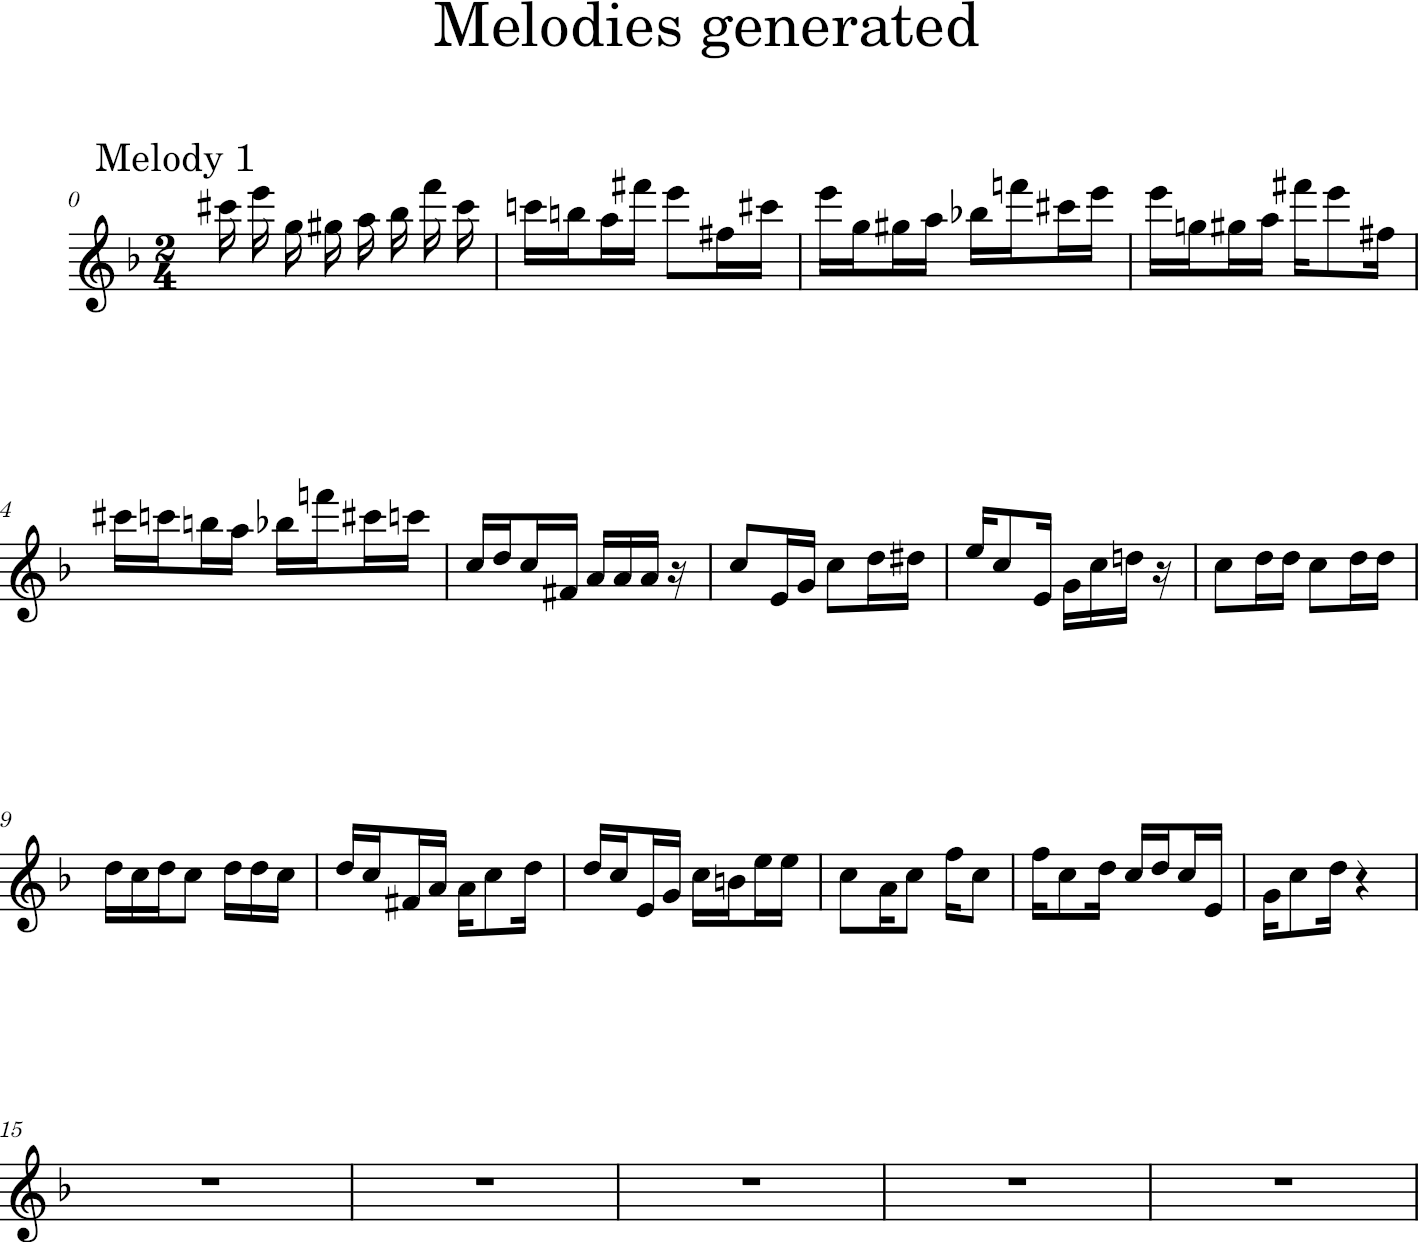

In [13]:
visualize("2/4",["F"],[generated_melody]).show()

In [14]:
#Folk (Windows)
music21.environment.set('musescoreDirectPNGPath',str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
music21.environment.set('musicxmlPath', str(os.path.join("C:\\", "Program Files","MuseScore 4","bin","MuseScore4.exe")))
visualize("2/4",["E"],[generated_melody]).show("musicxml")